In [9]:
%matplotlib inline

import sys
import awkward_kaitai as ak
import awkward
import matplotlib.pyplot as plt # plotting modules
import random
import numpy as np # numpy provides useful array manipulations like average, max, etc.
from pathlib import Path
import pprint

sys.path.append("..")

In [10]:
xia = ak.Reader("../src-pixie4e-awkward/libpixie4e.so")
pixie_data =  xia.load("../data/pixie4e/pixie4e.set")

In [11]:
# Show the fields for data events
print(pixie_data.fields)

['pixie4eA__Zfile_header', 'pixie4eA__Zevents', 'pixie4eA__Zfile_footer']


In [12]:
# Show the data structure of events
events = pixie_data['pixie4eA__Zevents']
events

<Array [{eventA__Zelements: [{...}, ...]}] type='1 * {eventA__Zelements: va...'>

In [13]:
energy = []
userPsaValue = []

for event in events['eventA__Zelements']:
    header = event['elementA__Zheader']
    energy.append(header['channel_headerA__Zenergy'])
    userPsaValue.append(header['channel_headerA__Zuser_psa_value'])

In [29]:
energy_flat = awkward.flatten(energy)
userPsaValue_flat = awkward.flatten(userPsaValue)
print(energy_flat)
print(userPsaValue_flat)

[768, 8, 192, 32768, 0, 192, 32768, 0, 13333, ..., 32768, 0, 0, 0, 0, 0, 0, 0]
[0, 6, 1, 13, 0, 1, 13, 0, 0, 0, 0, 0, ..., 13, 0, 1, 13, 0, 0, 0, 0, 0, 0, 0]


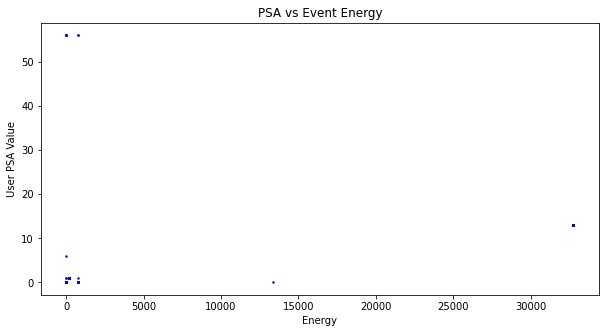

In [33]:
# Plot .set data
plt.figure(figsize=(10,5))
plt.scatter(energy_flat, userPsaValue_flat, marker='o', s=2, color='b')
plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy')
plt.show()